In [1]:
import pandas as pd
import re
import config
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings; 

warnings.simplefilter('ignore')
%matplotlib inline
%run parser.py

In [2]:
df = pd.DataFrame(parsedData, columns=['date', 'time', 'user', 'message'])
df['message_length'] = df['message'].str.len()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['time'])
df.dtypes

date              datetime64[ns]
user                      object
message                   object
message_length             int64
datetime          datetime64[ns]
dtype: object

In [3]:
df.describe()

,message_length
count,39998.000000
mean,24.939697
std,25.726112
min,1.000000
25%,11.000000
50%,19.000000
75%,32.000000
max,1199.000000


In [4]:
df.user.sort_values().unique()

array(['054', '101', '108', '183', '234', '260', '377', '523', '565',
       '633', '683', '778', '831', '835', '852', '861', '965', '988',
       None], dtype=object)

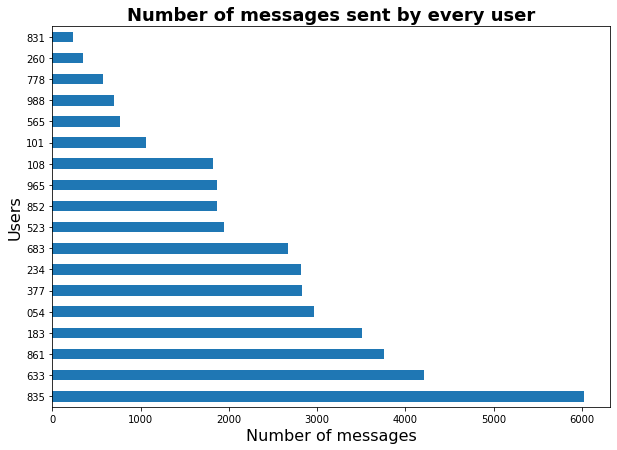

In [21]:
plt.figure(figsize=(10,7))
plt.title('Number of messages sent by every user', fontdict = { 'fontsize' : 18, 'weight' : 'bold' })
plt.xlabel('Number of messages', fontsize=16)
plt.ylabel('Users', fontsize=16)
df['user'].value_counts().plot(kind="barh")

Text(0, 0.5, 'Number of messages')

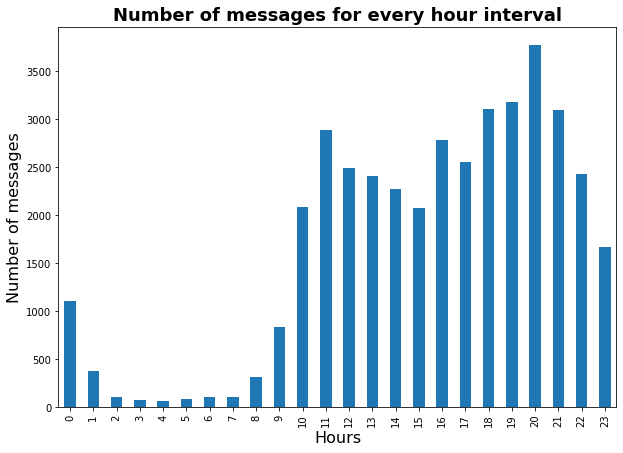

In [22]:
plt.figure(figsize=(10,7))
plt.title('Number of messages for every hour interval', fontdict = { 'fontsize' : 18, 'weight' : 'bold' })
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Number of messages', fontsize=16)
df.groupby(df["datetime"].dt.hour)['user'].count().plot(kind="bar")

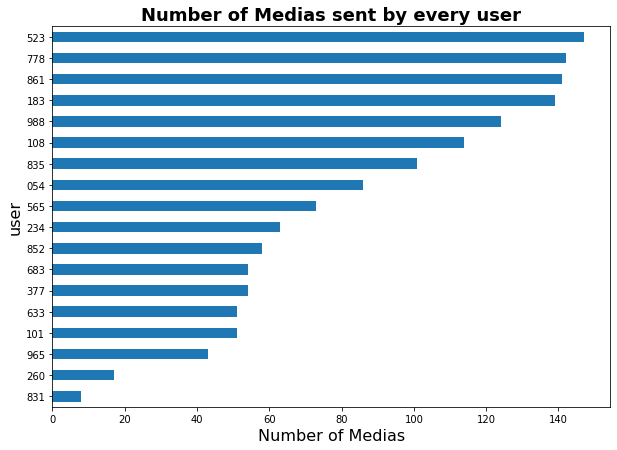

In [27]:
plt.figure(figsize=(10,7))
plt.title('Number of Medias sent by every user', fontdict = { 'fontsize' : 18, 'weight' : 'bold' })
plt.xlabel('Number of Medias', fontsize=16)
plt.ylabel('Users', fontsize=16)
df[(df['message'] == '<Media omessi>') | (df['message'] == '<Media oitted>')].groupby(['user'])['message'].count().sort_values().plot(kind="barh")

Text(0.5, 0, 'Dates')

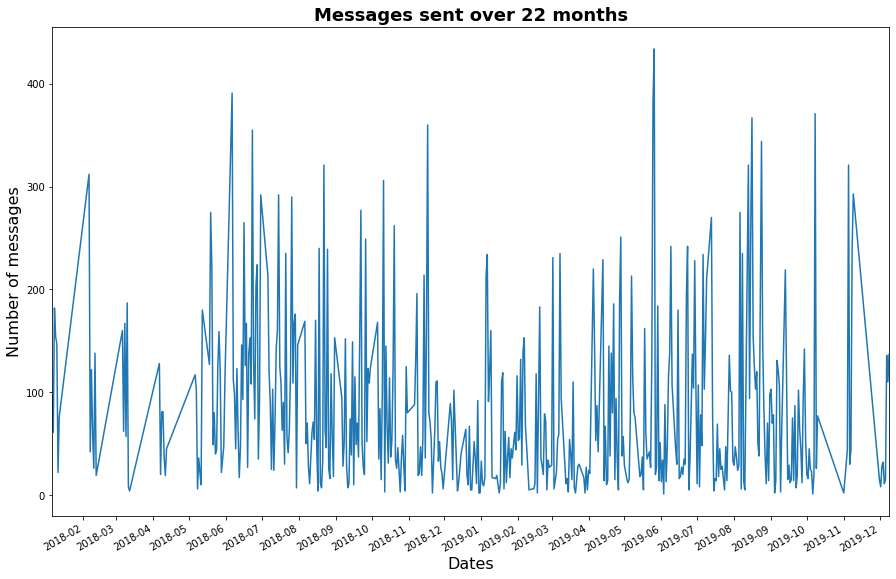

In [32]:
plt.figure(figsize=(15,10))
plt.title('Messages sent over 22 months', fontdict = { 'fontsize' : 18, 'weight' : 'bold' })
plt.ylabel('Number of messages', fontsize=16)
x = df.groupby(['date']).count()['message']
x.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate() # Rotation
plt.xlabel('Date', fontsize=16)
#We can see that the peak is about 430 messages in one day on the end of May 2019

In [9]:
#26/05/19 was the date of European elections... we had a nice debate :)
#434 messages
df[df['date'] == '26/05/19'].shape

(434, 5)

Text(0.5, 0, 'Date')

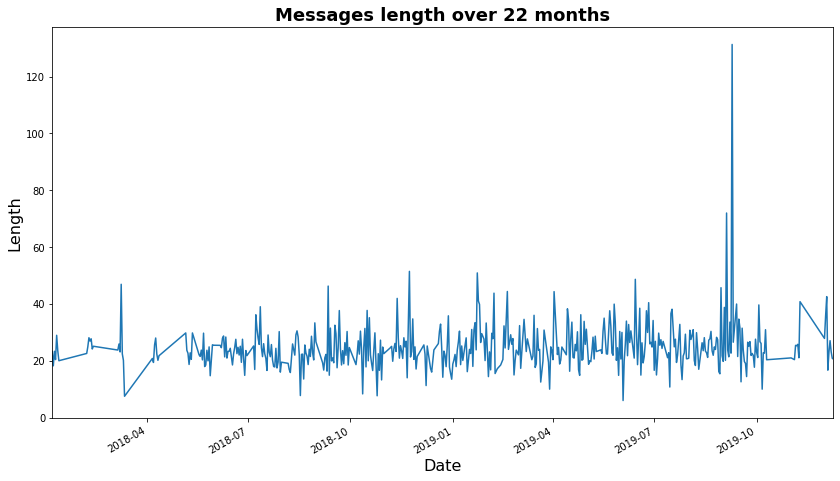

In [34]:
plt.figure(figsize=(14,8))
plt.title('Messages length over 22 months', fontdict = { 'fontsize' : 18, 'weight' : 'bold' })
plt.ylabel('Length', fontsize=16)
df.groupby(['date'])['message_length'].mean().plot()
plt.xlabel('Date', fontsize=16)

In [14]:
#Of course i wanted to see the outlier... :)
df[df['message_length'] == df['message_length'].max()]['message'].values

array(['Salve Francesco, ci scusiamo se le nostre maniere possano non essere sembrate le più cordiali, non era nostro intento essere percepiti come maleducati. Come capirete il sabato è uno dei pochi giorni in cui la domanda è alta e riusciamo quindi a riempire la sala del nostro locale, maturando un margine che ci consenta di tenere il locale aperto anche durante la settimana quando la domanda è più bassa. Purtroppo in un piccolo locale come il nostro, tre persone che non si presentano senza preavviso il sabato sera causano un mancato introito di circa 100€, somma che rappresenta la paga giornaliera di un nostro dipendente, vi assicuriamo che il locale non era ancora pieno semplicemente perchè gli altri ospiti dovevano ancora arrivare. Per quella sera infatti, abbiamo dovuto rifiutare 3 prenotazioni. Per quanto riguarda le nostre segnalazioni, possiamo garantire che ciò vi era già stato segnalato più volte in passato durante le quali eravate stati informati che specialmente il sabato 